<a href="https://colab.research.google.com/github/lancelotzomax/2021/blob/master/Negative_Emotion_Trend_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Negative Emotion Trend
It is only until recently that people start to be more and more aware of mental condition. A growing body of evidence shows that people in negative mood use language differently. Many studies have unveiled a class of words that can help accurately detect whether someone is in negative emotions.

To analyze the trend of negative emotion, we build an **Anxious Depression (AD) Prediction Model** to make prediction on AD in each season. We follow the "Anxiety Lexicon Base", which was proposed in the research **Anxious Depression Prediction in Real-time Social Data** by Akshi Kumar et al., label the quotes if anxiety depression-related words are included, and analyze the trend of negative emotion in the year 2015, 2017, 2018 and 2019*.

The following sub-sections elucidate the details of the model.

### 1. Data Collection & Import
The quote datasets from the year 2015, 2017, 2018, and 2019 are extracted using the 'Tutorial_Notebook' provided by the TA. The first 1 million quote data in each year are considered for this research. Each quote's data consist of 11 attributes: ID ('Unnamed: 0'), quoteID, quotation, speaker, qids, date, numOccurrences, probas, urls, phase ,and domains. 


### 2. Pre-processing
Pre-processing helps clean and filter the data required to undergo following feature extraction. The process includes:

* Extract the attributes of 'quotation', 'speaker', and 'date' from the original dataset of 1 million quotes and form a new dataframe

* Create a new column "anxiety feature" to label if the quotes include words in anxiety lexicon base.

* Parse the date and assign 'year' 'month' and 'date' into the dataframe

* Split the dataframe by month and form 12 dataframes 

### 3. Feature Engineering & Tokenization

In this step, we randomly boostrap 10000 samples from the dataframe of each month, and we repeat it for 30 times. The process includes

* Tokenization of quotation in each quote, including casefolding, tokenization, stopword removal, non-alphabet & non-number filtering.

* Label the quote if the quote includes words in anxiety_lexicon base 

* Record by month the numbers of quotes related to anxiety depression words

### 4. Data Recording

We record the average number of negative quotes and its standard deviation into the lists, respectively. In the following programming, the datasets from these 4 years undergo the aforementioned steps year by year. 

### 5. Summaary & Plotting
Here, we make a line plot descriping the average number of quotes related to anxiety depression words in each year when bootstrapping 10 thousand quotes in each month. 


Ps. The data in 2016 and 2020 are ignored in our analysis as the lack amount of data in these two years may not be representative to present the anxiety depression over seasons.)



Mount the Google Drive to link to the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import package

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil.parser
import nltk, sklearn
import matplotlib.pyplot as plt

# Import textblob to perform sentiment analysis 
from textblob import TextBlob
from sklearn.utils import resample

# Import nltk to conduct word tokenization
from nltk import wordpunct_tokenize
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Use lst_mean and lst_std to record annual average number of negative quotes when bootstrapping 10000 quotes 
lst_mean = []
lst_std = []

##Process dataset in 2015

### 1. Data Collection & Import


In [6]:
sample_2015 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2015_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2015

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2015-08-31-000271,... a great day for veterans here in Littleton...,Jeanne Shaheen,['Q270316'],2015-08-31 02:10:00,2,"[['Jeanne Shaheen', '0.742'], ['None', '0.2359...",['http://www.unionleader.com/article/20150831/...,E,"['com', 'com']"
1,1,2015-12-08-029916,How FFA scored 32 own goals in 18 months and C...,None,[],2015-12-08 00:00:00,2,"[['None', '0.563'], ['David Gallop', '0.437']]",['http://feeds.theroar.com.au/~r/theroar/~3/tZ...,E,"['com.au', 'com.au']"
2,2,2015-09-10-000206,[ Amy ] was placed under an unacceptable amoun...,None,[],2015-09-10 21:18:59,1,"[['None', '0.9634'], ['Amy Robinson', '0.0366']]",['http://www.thefashionspot.com/buzz-news/late...,E,['com']
3,3,2015-07-23-032707,How High Will These Numbers Go?,None,[],2015-07-23 14:57:49,3,"[['None', '0.9019'], ['Chubby Checker', '0.098...","['http://www.billboard.com/node/6641719', 'htt...",E,"['com', 'com', 'com']"
4,4,2015-10-04-000115,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,['Q1253'],2015-10-04 08:27:38,2,"[['Ban Ki-moon', '0.8399'], ['None', '0.1601']]",['http://muslimnews.co.uk/news/middle-east/afg...,E,"['co.uk', 'co.uk']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-08-19-043795,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,['Q1064771'],2015-08-19 02:23:07,2,"[['Randy Wolf', '0.4833'], ['None', '0.412'], ...",['http://www.cbssports.com/mlb/writer/jon-heym...,E,"['com', 'com']"
999996,999996,2015-04-16-001100,A lot of that can only come from getting live ...,William Worth,['Q1401372'],2015-04-16 19:03:00,2,"[['William Worth', '0.7726'], ['None', '0.2274']]",['http://www.baltimoresun.com/sports/college/f...,E,"['com', 'com']"
999997,999997,2015-10-14-055008,I'm delighted that I was able to get 12 games ...,Freddie Woodman,['Q20127322'],2015-10-14 12:35:26,1,"[['Freddie Woodman', '0.7456'], ['None', '0.25...",['http://thefa.com/news/england/development/20...,E,['com']
999998,999998,2015-09-30-002515,A lot of the hard work has been done in the le...,Anne Field,['Q19335418'],2015-09-30 18:00:00,2,"[['Anne Field', '0.5315'], ['None', '0.4685']]",['http://dailyliberal.com.au/story/3393888/exc...,E,"['com.au', 'com.au']"


### 2. Pre-processing

In [7]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2015)
selected_columns_2015 = sample_2015[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2015[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2015)):
  dt = dateutil.parser.isoparse(selected_columns_2015.date[row])
  selected_columns_2015.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2015.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2015.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2015

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,... a great day for veterans here in Littleton...,Jeanne Shaheen,2015-08-31 02:10:00,0,2015,08,31
1,How FFA scored 32 own goals in 18 months and C...,None,2015-12-08 00:00:00,0,2015,12,08
2,[ Amy ] was placed under an unacceptable amoun...,None,2015-09-10 21:18:59,0,2015,09,10
3,How High Will These Numbers Go?,None,2015-07-23 14:57:49,0,2015,07,23
4,[ Ban ] recalls that hospitals and medical per...,Ban Ki-moon,2015-10-04 08:27:38,0,2015,10,04
...,...,...,...,...,...,...,...
999995,I'm definitely not trying to bad-mouth the Blu...,Randy Wolf,2015-08-19 02:23:07,0,2015,08,19
999996,A lot of that can only come from getting live ...,William Worth,2015-04-16 19:03:00,0,2015,04,16
999997,I'm delighted that I was able to get 12 games ...,Freddie Woodman,2015-10-14 12:35:26,0,2015,10,14
999998,A lot of the hard work has been done in the le...,Anne Field,2015-09-30 18:00:00,0,2015,09,30


In [8]:
# Split the dataframe by month
jan_data_2015 = selected_columns_2015[selected_columns_2015.month == '01']
feb_data_2015 = selected_columns_2015[selected_columns_2015.month == '02']
mar_data_2015 = selected_columns_2015[selected_columns_2015.month == '03']
apr_data_2015 = selected_columns_2015[selected_columns_2015.month == '04']
may_data_2015 = selected_columns_2015[selected_columns_2015.month == '05']
jun_data_2015 = selected_columns_2015[selected_columns_2015.month == '06']
jul_data_2015 = selected_columns_2015[selected_columns_2015.month == '07']
aug_data_2015 = selected_columns_2015[selected_columns_2015.month == '08']
sep_data_2015 = selected_columns_2015[selected_columns_2015.month == '09']
oct_data_2015 = selected_columns_2015[selected_columns_2015.month == '10']
nov_data_2015 = selected_columns_2015[selected_columns_2015.month == '11']
dec_data_2015 = selected_columns_2015[selected_columns_2015.month == '12']


### 3. Feature Engineering & Tokenization


In [36]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [9]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2015 = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2015 = resample(jan_data_2015, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2015 = resample(feb_data_2015, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2015 = resample(mar_data_2015, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2015 = resample(apr_data_2015, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2015 = resample(may_data_2015, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2015 = resample(jun_data_2015, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2015 = resample(jul_data_2015, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2015 = resample(aug_data_2015, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2015 = resample(sep_data_2015, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2015 = resample(oct_data_2015, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2015 = resample(nov_data_2015, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2015 = resample(dec_data_2015, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2015, feb_sample_data_2015, mar_sample_data_2015, apr_sample_data_2015, may_sample_data_2015, jun_sample_data_2015, 
          jul_sample_data_2015, aug_sample_data_2015, sep_sample_data_2015, oct_sample_data_2015, nov_sample_data_2015, dec_sample_data_2015]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # record the monthly number of anxiety rows into lst_2015
  lst_2015.append(rows)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
# As we randomly sample the data for 30 times, lst_2015 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2015)


30


### 4. Data Recording 

In [11]:
# Convert lst_2015 into a dataframe
bootstraped_30_times_anxiety_rows_2015 = pd.DataFrame(lst_2015)
bootstraped_30_times_anxiety_rows_2015 = bootstraped_30_times_anxiety_rows_2015.transpose()
bootstraped_30_times_anxiety_rows_2015

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,635,615,614,593,636,635,667,658,641,599,627,652,649,599,663,623,599,667,598,654,610,637,636,611,631,606,620,638,643,600
02,612,596,630,608,614,652,652,613,601,607,619,612,610,612,641,633,657,631,633,639,648,651,633,615,631,616,605,647,660,649
03,675,653,652,663,637,631,610,623,626,659,653,598,634,643,649,681,656,618,656,650,682,620,658,616,636,655,663,630,622,613
04,617,592,648,632,666,611,646,601,606,659,633,625,619,637,640,655,630,637,645,618,660,642,629,632,633,630,611,622,663,631
05,632,652,649,637,615,668,630,648,665,659,646,647,630,634,631,631,636,660,650,653,633,602,649,673,697,675,650,665,651,649
06,649,666,648,658,680,695,647,645,663,696,647,632,617,660,651,640,621,669,611,619,643,699,679,648,658,659,648,648,636,656
07,606,622,650,614,622,615,644,666,664,630,680,726,650,676,669,678,668,663,628,613,689,708,651,671,708,658,684,653,673,652
08,611,608,639,659,639,666,632,653,631,633,616,641,650,617,630,656,595,646,672,629,616,620,644,603,590,601,627,666,619,605
09,602,668,651,620,594,643,648,642,604,639,675,629,655,663,606,654,625,671,621,640,620,602,659,656,647,679,633,647,650,625


In [12]:
# Calculate the mean and the standard deviation of the number of rows related to anxiety depression words in 2015
anxiety_by_month_2015 = bootstraped_30_times_anxiety_rows_2015.mean(axis = 1)
mean_2015 = anxiety_by_month_2015.mean()
std_2015 = anxiety_by_month_2015.std()

# Record the mean and standard deviation in 2015 into lst_mean and lst_std 
lst_mean.append(mean_2015)
lst_std.append(std_2015)


##Process data in 2017


### 1. Data Collection & Import

In [13]:
sample_2017 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2017_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2017

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2017-05-01-000095,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,['Q6377094'],2017-05-01 17:00:00,1,"[['Kathryn Minshew', '0.7832'], ['None', '0.21...",['http://www.salon.com/2017/05/01/watch-do-com...,E,['com']
1,1,2017-09-12-090806,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,['Q185165'],2017-09-12 00:00:00,14,"[['Olivia Newton-John', '0.5358'], ['None', '0...",['http://www.femalefirst.co.uk/celebrity/olivi...,E,"['co.uk', 'com', 'com', 'com', 'com', 'com', '..."
2,2,2017-10-24-000065,[ Although ] it highlights the urgent need for...,Radha Stirling,['Q7280196'],2017-10-24 23:57:43,2,"[['Radha Stirling', '0.7996'], ['None', '0.155...",['https://uk.news.yahoo.com/briton-caught-duba...,E,"['com', 'com']"
3,3,2017-12-04-073931,I've had both knees replaced and I walk with a...,None,[],2017-12-04 01:57:56,1,"[['None', '0.7649'], ['Paul Crowley', '0.2351']]",['https://www.itemlive.com/2017/12/03/lynn-sen...,E,['com']
4,4,2017-06-08-000150,"... and if the data so warrants, act for a bro...",Viral Acharya,['Q28076452'],2017-06-08 09:51:00,2,"[['Viral Acharya', '0.9557'], ['None', '0.0443']]",['http://economictimes.indiatimes.com/mf/analy...,E,"['com', 'com']"
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2017-05-24-146387,"You have been to the brink of death and back, ...",Larry Bird,['Q190152'],2017-05-24 04:52:05,1,"[['Larry Bird', '0.4201'], ['None', '0.3167'],...",['http://www.vvdailypress.com/news/20170523/pa...,E,['com']
999996,999996,2017-04-04-073336,It's weird because you start realising very qu...,Matt Okine,['Q17612856'],2017-04-04 06:09:05,1,"[['Matt Okine', '0.7874'], ['None', '0.2126']]",['http://junkee.com/sleep-much-now-pathetic-ma...,E,['com']
999997,999997,2017-10-24-167465,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,['Q42428503'],2017-10-24 21:04:36,1,"[['Michael Leitner', '0.6156'], ['None', '0.38...",['http://bcheights.com/2017/10/24/leitner-help...,E,['com']
999998,999998,2017-03-19-033000,It's when we start to hear from people that so...,Matt Schwartz,['Q17277187'],2017-03-19 04:00:27,1,"[['Matt Schwartz', '0.5986'], ['None', '0.4014']]",['http://www.nola.com/business/index.ssf/2017/...,E,['com']


### 2. Pre-processing### 

In [14]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2017)
selected_columns_2017 = sample_2017[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2017[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2017)):
  dt = dateutil.parser.isoparse(selected_columns_2017.date[row])
  selected_columns_2017.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2017.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2017.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2017

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,[ A ] lot of the people who use The Muse sort ...,Kathryn Minshew,2017-05-01 17:00:00,0,2017,05,01
1,I've had and I'm having an amazing life. So I ...,Olivia Newton-John,2017-09-12 00:00:00,0,2017,09,12
2,[ Although ] it highlights the urgent need for...,Radha Stirling,2017-10-24 23:57:43,0,2017,10,24
3,I've had both knees replaced and I walk with a...,None,2017-12-04 01:57:56,0,2017,12,04
4,"... and if the data so warrants, act for a bro...",Viral Acharya,2017-06-08 09:51:00,0,2017,06,08
...,...,...,...,...,...,...,...
999995,"You have been to the brink of death and back, ...",Larry Bird,2017-05-24 04:52:05,0,2017,05,24
999996,It's weird because you start realising very qu...,Matt Okine,2017-04-04 06:09:05,0,2017,04,04
999997,"You have Jordanian, Palestinian, and Israeli a...",Michael Leitner,2017-10-24 21:04:36,0,2017,10,24
999998,It's when we start to hear from people that so...,Matt Schwartz,2017-03-19 04:00:27,0,2017,03,19


In [15]:
# Split the dataframe by month
jan_data_2017 = selected_columns_2017[selected_columns_2017.month == '01']
feb_data_2017 = selected_columns_2017[selected_columns_2017.month == '02']
mar_data_2017 = selected_columns_2017[selected_columns_2017.month == '03']
apr_data_2017 = selected_columns_2017[selected_columns_2017.month == '04']
may_data_2017 = selected_columns_2017[selected_columns_2017.month == '05']
jun_data_2017 = selected_columns_2017[selected_columns_2017.month == '06']
jul_data_2017 = selected_columns_2017[selected_columns_2017.month == '07']
aug_data_2017 = selected_columns_2017[selected_columns_2017.month == '08']
sep_data_2017 = selected_columns_2017[selected_columns_2017.month == '09']
oct_data_2017 = selected_columns_2017[selected_columns_2017.month == '10']
nov_data_2017 = selected_columns_2017[selected_columns_2017.month == '11']
dec_data_2017 = selected_columns_2017[selected_columns_2017.month == '12']

###3. Feature Engineering & Tokenization

In [ ]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [16]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2017 = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  # As the number of data in January, 2017 is less than 10 thousand, we do not take the data in this month into consideration
  feb_sample_data_2017 = resample(feb_data_2017, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2017 = resample(mar_data_2017, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2017 = resample(apr_data_2017, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2017 = resample(may_data_2017, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2017 = resample(jun_data_2017, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2017 = resample(jul_data_2017, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2017 = resample(aug_data_2017, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2017 = resample(sep_data_2017, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2017 = resample(oct_data_2017, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2017 = resample(nov_data_2017, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2017 = resample(dec_data_2017, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [feb_sample_data_2017, mar_sample_data_2017, apr_sample_data_2017, may_sample_data_2017, jun_sample_data_2017, 
          jul_sample_data_2017, aug_sample_data_2017, sep_sample_data_2017, oct_sample_data_2017, nov_sample_data_2017, dec_sample_data_2017]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # record the monthly number of anxiety rows into lst_2015
  lst_2017.append(rows)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
# As we randomly sample the data for 30 times, lst_2017 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2017)


30

### 4. Data Recordingg

In [18]:
# Convert lst_2017 into a dataframe
bootstraped_30_times_anxiety_rows_2017 = pd.DataFrame(lst_2017)
bootstraped_30_times_anxiety_rows_2017 = bootstraped_30_times_anxiety_rows_2017.transpose()
bootstraped_30_times_anxiety_rows_2017

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02,647,616,633,601,612,627,604,633,636,634,626,629,646,656,640,628,651,628,635,622,639,623,606,608,617,602,665,645,598,631
03,611,642,630,641,634,632,621,652,606,650,636,589,601,602,624,648,622,619,606,574,650,593,650,625,610,594,631,615,614,612
04,623,582,619,598,615,618,619,617,637,615,582,648,657,634,633,610,627,653,651,619,604,592,640,592,612,609,637,599,636,643
05,666,684,657,671,685,718,652,658,654,672,684,647,643,655,628,639,648,686,636,661,617,606,715,623,620,664,656,695,631,646
06,635,579,645,643,623,648,618,644,630,653,608,631,596,668,621,641,629,622,610,694,657,607,648,628,621,660,658,653,651,680
07,683,659,644,641,648,711,634,663,655,660,645,686,646,673,647,648,674,677,621,676,688,660,684,673,660,628,659,628,644,628
08,651,654,679,672,620,664,655,695,650,686,624,620,654,669,666,640,690,662,670,649,706,686,658,645,680,649,632,656,693,681
09,651,617,612,615,643,603,611,631,584,595,644,656,614,612,606,636,632,641,630,597,660,660,602,638,627,634,625,633,677,671
10,647,671,677,646,658,695,648,629,710,640,701,677,677,706,699,691,687,621,621,636,666,640,652,655,670,672,652,698,679,672


In [19]:
# Calculate the mean and the standard deviation of the number of rows related to anxiety depression words in 2017
anxiety_by_month_2017 = bootstraped_30_times_anxiety_rows_2017.mean(axis = 1)
mean_2017 = anxiety_by_month_2017.mean()
std_2017 = anxiety_by_month_2017.std()

# Record the mean and standard deviation in 2017 into lst_mean and lst_std 
lst_mean.append(mean_2017)
lst_std.append(std_2017)


##Process data in 2018

### 1. Data Collection & Import

In [20]:
sample_2018 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2018_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2018

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2018-06-30-000005,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,['Q55997400'],2018-06-30 07:00:00,3,"[['Marcus Eriksen', '0.6814'], ['None', '0.318...",['http://www.santacruzsentinel.com/environment...,E,"['com', 'com', 'com']"
1,1,2018-12-06-000021,... a race to see who could sail around the wo...,James Marsh,"['Q2720543', 'Q41757028', 'Q56510432', 'Q61389...",2018-12-06 12:00:34,1,"[['James Marsh', '0.6787'], ['None', '0.3213']]",['http://filmthreat.com/reviews/the-mercy/'],E,['com']
2,2,2018-04-25-000107,... a tyrant whose chin might be lumps of grap...,None,[],2018-04-25 03:48:37,2,"[['None', '0.7475'], ['Oliver Stone', '0.1527'...",['https://slate.com/culture/2018/04/heres-how-...,E,"['com', 'com']"
3,3,2018-06-28-000032,[ Alberto ] attempted at this time to resolve ...,None,[],2018-06-28 04:01:03,2,"[['None', '0.6688'], ['El Patron', '0.3312']]",['http://comicbook.com/2018/06/28/alberto-el-p...,E,"['com', 'com']"
4,4,2018-09-15-000010,... Among the many observations I have receive...,None,[],2018-09-15 00:05:14,1,"[['None', '0.9496'], ['Pope Francis', '0.0504']]",['http://wjla.com/news/local/facing-calls-to-r...,E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2018-09-07-012816,"But perhaps more importantly, these techniques...",Leo Smith,"['Q6524244', 'Q6524245']",2018-09-07 11:34:23,1,"[['Leo Smith', '0.9198'], ['None', '0.0802']]",['https://www.digitaltrends.com/cool-tech/anat...,E,['com']
999996,999996,2018-10-04-014443,But riders will be upset that the critically-n...,Craig Richards,"['Q5181367', 'Q5181370', 'Q5181371']",2018-10-04 01:34:51,2,"[['Craig Richards', '0.9278'], ['None', '0.072...",['http://www.smh.com.au/national/victoria/busy...,E,"['com.au', 'com.au']"
999997,999997,2018-07-05-010899,But salvation is on its way and there is a sol...,Andrea Leadsom,['Q750091'],2018-07-05 11:50:00,2,"[['Andrea Leadsom', '0.9093'], ['None', '0.090...",['https://stv.tv/news/politics/1421928-snp-mps...,E,"['tv', 'com']"
999998,999998,2018-07-23-011483,But... she just wanted to keep pushing... all ...,None,[],2018-07-23 00:00:00,1,"[['None', '0.7298'], ['Ronda Rousey', '0.1168'...",['http://www.foxnews.com/entertainment/2018/07...,E,['com']


### 2. Pre-processing

In [21]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2018 = sample_2018[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2018[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2018)):
  dt = dateutil.parser.isoparse(selected_columns_2018.date[row])
  selected_columns_2018.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2018.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2018.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2018

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,... a minimum of 5.25 trillion (plastic) parti...,Marcus Eriksen,2018-06-30 07:00:00,0,2018,06,30
1,... a race to see who could sail around the wo...,James Marsh,2018-12-06 12:00:34,0,2018,12,06
2,... a tyrant whose chin might be lumps of grap...,None,2018-04-25 03:48:37,0,2018,04,25
3,[ Alberto ] attempted at this time to resolve ...,None,2018-06-28 04:01:03,0,2018,06,28
4,... Among the many observations I have receive...,None,2018-09-15 00:05:14,0,2018,09,15
...,...,...,...,...,...,...,...
999995,"But perhaps more importantly, these techniques...",Leo Smith,2018-09-07 11:34:23,0,2018,09,07
999996,But riders will be upset that the critically-n...,Craig Richards,2018-10-04 01:34:51,0,2018,10,04
999997,But salvation is on its way and there is a sol...,Andrea Leadsom,2018-07-05 11:50:00,0,2018,07,05
999998,But... she just wanted to keep pushing... all ...,None,2018-07-23 00:00:00,0,2018,07,23


In [22]:
# Split the dataframe by month
jan_data_2018 = selected_columns_2018[selected_columns_2018.month == '01']
feb_data_2018 = selected_columns_2018[selected_columns_2018.month == '02']
mar_data_2018 = selected_columns_2018[selected_columns_2018.month == '03']
apr_data_2018 = selected_columns_2018[selected_columns_2018.month == '04']
may_data_2018 = selected_columns_2018[selected_columns_2018.month == '05']
jun_data_2018 = selected_columns_2018[selected_columns_2018.month == '06']
jul_data_2018 = selected_columns_2018[selected_columns_2018.month == '07']
aug_data_2018 = selected_columns_2018[selected_columns_2018.month == '08']
sep_data_2018 = selected_columns_2018[selected_columns_2018.month == '09']
oct_data_2018 = selected_columns_2018[selected_columns_2018.month == '10']
nov_data_2018 = selected_columns_2018[selected_columns_2018.month == '11']
dec_data_2018 = selected_columns_2018[selected_columns_2018.month == '12']

### 3. Feature Engineering & Tokenization

In [ ]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [23]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2018 = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2018 = resample(jan_data_2018, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2018 = resample(feb_data_2018, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2018 = resample(mar_data_2018, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2018 = resample(apr_data_2018, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2018 = resample(may_data_2018, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2018 = resample(jun_data_2018, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2018 = resample(jul_data_2018, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2018 = resample(aug_data_2018, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2018 = resample(sep_data_2018, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2018 = resample(oct_data_2018, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2018 = resample(nov_data_2018, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2018 = resample(dec_data_2018, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2018, feb_sample_data_2018, mar_sample_data_2018, apr_sample_data_2018, may_sample_data_2018, jun_sample_data_2018, 
          jul_sample_data_2018, aug_sample_data_2018, sep_sample_data_2018, oct_sample_data_2018, nov_sample_data_2018, dec_sample_data_2018]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # record the monthly number of anxiety rows into lst_2018
  lst_2018.append(rows)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
# As we randomly sample the data for 30 times, lst_2018 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2018)


30

### 4. Data Recording 

In [25]:
# Convert lst_2018 into a dataframe
bootstraped_30_times_anxiety_rows_2018 = pd.DataFrame(lst_2018)
bootstraped_30_times_anxiety_rows_2018 = bootstraped_30_times_anxiety_rows_2018.transpose()
bootstraped_30_times_anxiety_rows_2018

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,621,662,636,641,648,612,610,649,612,604,625,618,649,627,662,633,652,652,638,629,566,676,656,623,656,604,665,636,635,660
02,626,700,604,642,619,650,636,673,635,645,630,614,637,650,615,626,647,685,644,683,657,648,654,652,658,685,679,634,613,640
03,664,616,636,648,644,664,656,632,655,677,613,647,615,629,634,640,648,636,640,645,666,660,631,640,669,654,601,626,621,635
04,648,639,634,685,629,649,662,651,634,667,634,642,664,643,665,634,651,621,663,631,654,683,619,670,637,657,631,648,639,626
05,645,622,627,650,653,632,624,622,617,608,631,649,652,602,616,662,636,643,616,656,659,650,584,607,641,626,640,667,648,640
06,667,656,693,658,663,630,693,678,660,657,678,650,677,675,678,687,660,650,624,611,684,699,649,625,671,632,653,677,685,642
07,682,675,649,698,672,664,667,669,692,663,677,674,682,654,656,668,637,584,670,650,684,660,654,636,676,647,673,620,643,629
08,692,635,668,665,671,653,680,664,624,665,707,664,612,627,618,647,647,672,664,656,627,694,621,631,656,683,644,641,664,653
09,672,653,653,661,697,694,658,607,658,651,670,675,655,673,695,659,673,645,666,723,674,632,638,650,636,657,639,646,660,656


In [26]:
# Calculate the mean and the standard deviation of the number of rows related to anxiety depression words in 2018
anxiety_by_month_2018 = bootstraped_30_times_anxiety_rows_2018.mean(axis = 1)
mean_2018 = anxiety_by_month_2018.mean()
std_2018 = anxiety_by_month_2018.std()

# Record the mean and standard deviation in 2017 into lst_mean and lst_std 
lst_mean.append(mean_2018)
lst_std.append(std_2018)


##Process data in 2019

### 1. Data Collection & Import

In [27]:
sample_2019 = pd.read_csv("/content/drive/MyDrive/Colab_bbear/2019_bbear_sample_sentence_0_1000000.csv", sep=',')
sample_2019

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,domains
0,0,2019-10-14-000009,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,[],2019-10-14 07:30:00,1,"[['None', '0.5595'], ['Julio Morales', '0.4405']]",['http://www.ivpressonline.com/news/local/ivc-...,E,['com']
1,1,2019-04-08-048753,It is immoral. It is harmful. It is hurtful.,President Donald Trump,['Q22686'],2019-04-08 16:22:00,44,"[['President Donald Trump', '0.5802'], ['None'...",['https://www.mercedsunstar.com/news/business/...,E,"['com', 'com', 'com', 'com', 'com', 'com', 'co..."
2,2,2019-07-17-000030,"[ Amber ] loves her son more than anything,",None,[],2019-07-17 22:54:35,1,"[['None', '0.8276'], ['Amber Portwood', '0.172...",['https://www.inquisitr.com/5535969/did-amber-...,E,['com']
3,3,2019-05-15-053302,It is important for our equine science student...,Sally Johnson,['Q42336656'],2019-05-15 18:03:22,1,"[['Sally Johnson', '0.5721'], ['None', '0.4279']]",['https://www.lanereport.com/113381/2019/05/qu...,E,['com']
4,4,2019-04-20-000011,... an Afrikaans family living in South Africa...,None,[],2019-04-20 22:30:57,1,"[['None', '0.8331'], ['you long', '0.1669']]",['http://filmthreat.com/reviews/the-harvester/'],E,['com']
...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2019-08-09-046378,It was a great time tonight with all the playe...,David Dill,['Q5232978'],2019-08-09 23:59:21,1,"[['David Dill', '0.7727'], ['None', '0.2273']]",['http://atleasttwopeople.wordpress.com/2019/0...,E,['com']
999996,999996,2019-07-08-002735,All in all I am really pleased with how the tr...,John Dempster,['Q6229145'],2019-07-08 15:55:43,2,"[['John Dempster', '0.8656'], ['None', '0.1345']]",['https://www.chad.co.uk/sport/football/mansfi...,E,"['co.uk', 'co.uk']"
999997,999997,2019-04-10-056895,It was a huge shift for the providers to reall...,Barbara Poppe,['Q4859227'],2019-04-10 06:00:54,1,"[['Barbara Poppe', '0.8828'], ['None', '0.1172']]",['https://www.seattletimes.com/seattle-news/ho...,E,['com']
999998,999998,2019-08-01-002864,All it needs is to give journalists normal acc...,None,[],2019-08-01 05:00:18,6,"[['None', '0.7118'], ['Hua Chunying', '0.2781'...",['http://www.digitaljournal.com/news/world/uig...,E,"['com', 'com', 'com', 'com', 'com.ph', 'com']"


### 2. Pre-processing

In [28]:
# Extract 'quotation', 'speaker' and 'date' columns from the original dataset (i.e., sample_2018)
selected_columns_2019 = sample_2019[['quotation', 'speaker', 'date']]

# Create a new column called 'anxiety_feature' 
# Parse dates in the 'date' column; assign year, month, day into three new columns: 'year', 'month' and 'day'
selected_columns_2019[['anxiety_feature', 'year', 'month', 'day']] = '0'

for row in range(len(selected_columns_2019)):
  dt = dateutil.parser.isoparse(selected_columns_2019.date[row])
  selected_columns_2019.xs(row)['year'] = dt.strftime('%Y')  # Assign the year into 'year' column
  selected_columns_2019.xs(row)['month'] = dt.strftime('%m') # Assign the month into 'month' column
  selected_columns_2019.xs(row)['day'] = dt.strftime('%d')  # Assign the date into 'day' column

selected_columns_2019

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,quotation,speaker,date,anxiety_feature,year,month,day
0,% 9: D: D @? 6 H2J H6 E9@F89E H6 4@F=5 8: G6 3...,None,2019-10-14 07:30:00,0,2019,10,14
1,It is immoral. It is harmful. It is hurtful.,President Donald Trump,2019-04-08 16:22:00,0,2019,04,08
2,"[ Amber ] loves her son more than anything,",None,2019-07-17 22:54:35,0,2019,07,17
3,It is important for our equine science student...,Sally Johnson,2019-05-15 18:03:22,0,2019,05,15
4,... an Afrikaans family living in South Africa...,None,2019-04-20 22:30:57,0,2019,04,20
...,...,...,...,...,...,...,...
999995,It was a great time tonight with all the playe...,David Dill,2019-08-09 23:59:21,0,2019,08,09
999996,All in all I am really pleased with how the tr...,John Dempster,2019-07-08 15:55:43,0,2019,07,08
999997,It was a huge shift for the providers to reall...,Barbara Poppe,2019-04-10 06:00:54,0,2019,04,10
999998,All it needs is to give journalists normal acc...,None,2019-08-01 05:00:18,0,2019,08,01


In [29]:
# Split the dataframe by month
jan_data_2019 = selected_columns_2019[selected_columns_2019.month == '01']
feb_data_2019 = selected_columns_2019[selected_columns_2019.month == '02']
mar_data_2019 = selected_columns_2019[selected_columns_2019.month == '03']
apr_data_2019 = selected_columns_2019[selected_columns_2019.month == '04']
may_data_2019 = selected_columns_2019[selected_columns_2019.month == '05']
jun_data_2019 = selected_columns_2019[selected_columns_2019.month == '06']
jul_data_2019 = selected_columns_2019[selected_columns_2019.month == '07']
aug_data_2019 = selected_columns_2019[selected_columns_2019.month == '08']
sep_data_2019 = selected_columns_2019[selected_columns_2019.month == '09']
oct_data_2019 = selected_columns_2019[selected_columns_2019.month == '10']
nov_data_2019 = selected_columns_2019[selected_columns_2019.month == '11']
dec_data_2019 = selected_columns_2019[selected_columns_2019.month == '12']

### 3. Feature Engineering & Tokenization

In [ ]:
# Define a seed list of anxious depression related words

anxiety_lexicon_base = ['fat', 'bad', 'weak', 'problem', 'tired', 'illusion', 'restless', 'bored', 'crap', 'shit', 'fuck', 'sad', 'escape', 'useless', 'meaningless', 'crying', 'reject', 'suffer', 'sleepless', 'never', 'bored', 'afraid', 'unhappy', 'ugly', 'upset', 'awful', 'torture', 'unsuccessful', 'helpless', 'suffer', 'fail', 'sorrow', 'nobody', 'blame', 'damaged', 'shatter', 'pathetic', 'insomnia', 'kill', 'panic', 'lonely', 'hate', 'depressed', 'frustrated', 'loser', 'suicidal', 'hurt', 'painful', 'disappoint', 'broke', 'abandon', 'worthless', 'regret', 'dissatisfied', 'lost', 'empty', 'destroy', 'ruin', 'die', 'sick']

In [30]:
# Create a list to record the number of rows related to anxiety depression words in each month 
lst_2019 = []

# repeat to bootstrap for 30 times 
for i in range(0,30):

  # randomly pool 10000 samples from the sample data in each month
  jan_sample_data_2019 = resample(jan_data_2019, n_samples = 10000, replace = False, random_state = i)
  feb_sample_data_2019 = resample(feb_data_2019, n_samples = 10000, replace = False, random_state = i)
  mar_sample_data_2019 = resample(mar_data_2019, n_samples = 10000, replace = False, random_state = i)
  apr_sample_data_2019 = resample(apr_data_2019, n_samples = 10000, replace = False, random_state = i)
  may_sample_data_2019 = resample(may_data_2019, n_samples = 10000, replace = False, random_state = i)
  jun_sample_data_2019 = resample(jun_data_2019, n_samples = 10000, replace = False, random_state = i)
  jul_sample_data_2019 = resample(jul_data_2019, n_samples = 10000, replace = False, random_state = i)
  aug_sample_data_2019 = resample(aug_data_2019, n_samples = 10000, replace = False, random_state = i)
  sep_sample_data_2019 = resample(sep_data_2019, n_samples = 10000, replace = False, random_state = i)
  oct_sample_data_2019 = resample(oct_data_2019, n_samples = 10000, replace = False, random_state = i)
  nov_sample_data_2019 = resample(nov_data_2019, n_samples = 10000, replace = False, random_state = i)
  dec_sample_data_2019 = resample(dec_data_2019, n_samples = 10000, replace = False, random_state = i)

  # Combine sample data of 12 months into one dataframe
  data_frames = [jan_sample_data_2019, feb_sample_data_2019, mar_sample_data_2019, apr_sample_data_2019, may_sample_data_2019, jun_sample_data_2019, 
          jul_sample_data_2019, aug_sample_data_2019, sep_sample_data_2019, oct_sample_data_2019, nov_sample_data_2019, dec_sample_data_2019]
  sample_data = pd.concat(data_frames, axis=0, join='inner')
  
  # Reset index to undergo text mining
  sample_data.reset_index(inplace=True)

  # Tokenize sample_data 

  for j in range(len(sample_data)):
    # Casefolding: convert all in lowercase 
    sentence = sample_data.quotation[j].lower()

    # Tokenize the sentence 
    tokens = wordpunct_tokenize(sentence)

    # Remove the stopword
    filtered_tokens = [word for word in tokens if not word in stopwords]

    # Filter out tokens which are not alphabets or numbers 
    filtered_tokens2 = [word for word in filtered_tokens if word.isalnum()] 

    # Check if anxiety depression related words are included in a text
    flag = [word for word in filtered_tokens2 if word in anxiety_lexicon_base]
    
    # if yes, assign '1' into anxiety_feature
    if (len(flag) != 0):
      sample_data.anxiety_feature[j] = '1'

  # Choose rows in which anxiety_feature is '1'
  anxiety_rows_in_sample_data = sample_data[sample_data['anxiety_feature'] == '1']

  # group anxiety rows by the month
  grouped_anxiety_rows = anxiety_rows_in_sample_data.groupby(anxiety_rows_in_sample_data.month)
  
  # collect the number of anxiety rows in each month
  rows = grouped_anxiety_rows.size()

  # record the monthly number of anxiety rows into lst_2019
  lst_2019.append(rows)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# As we randomly sample the data for 30 times, lst_2019 contains 
# 30 sub-lists regarding the number of rows related to anxiety depression word in each month
len(lst_2019)

30

### 4. Data Recording 

In [32]:
# Convert lst_2019 into a dataframe
bootstraped_30_times_anxiety_rows_2019 = pd.DataFrame(lst_2019)
bootstraped_30_times_anxiety_rows_2019 = bootstraped_30_times_anxiety_rows_2019.transpose()
bootstraped_30_times_anxiety_rows_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,629,682,648,709,664,620,625,666,655,693,650,665,631,664,644,650,662,667,667,692,606,660,675,658,634,649,695,704,604,632
02,654,683,686,692,672,717,639,664,677,679,680,690,668,665,692,713,703,690,638,667,659,713,703,653,684,617,685,672,680,651
03,672,629,654,663,665,683,664,695,630,643,640,671,662,700,607,656,629,666,665,627,677,658,661,648,697,665,707,685,683,679
04,676,666,657,679,694,681,681,705,704,655,650,637,662,687,686,678,664,711,696,669,675,648,698,652,687,672,674,726,683,693
05,689,628,663,690,668,685,657,615,644,679,653,697,687,615,668,647,663,662,632,634,688,685,631,650,615,672,618,708,671,680
06,676,654,649,603,672,629,690,639,684,646,668,594,634,608,606,649,647,612,625,645,596,638,639,600,615,682,636,665,595,661
07,668,648,634,651,621,640,685,612,632,635,650,669,601,639,664,662,670,629,617,638,649,634,641,665,641,646,626,676,649,699
08,712,663,697,642,641,692,666,727,682,661,688,674,674,651,658,666,668,643,671,688,624,711,677,685,644,661,686,731,639,655
09,606,676,675,650,670,656,618,671,658,635,648,670,643,666,664,664,698,653,654,684,631,630,637,664,665,664,640,628,617,637


In [33]:
# Calculate the mean and the standard deviation of the number of rows related to anxiety depression words in 2018
anxiety_by_month_2019 = bootstraped_30_times_anxiety_rows_2019.mean(axis = 1)
mean_2019 = anxiety_by_month_2019.mean()
std_2019 = anxiety_by_month_2019.std()

# Record the mean and standard deviation in 2017 into lst_mean and lst_std 
lst_mean.append(mean_2019)
lst_std.append(std_2019)


###5. Summary & Plotting

Here, a line plot describing the annual average number of negative quotes out of 10000 boostrapped quotes is illustrated.

In [34]:
# Combine lst_mean and lst_std into a dataframe
trend = {'Mean': lst_mean, 'STD': lst_std}  
  
# Create DataFrame  
trend_curve = pd.DataFrame(trend, index =['2015', '2017', '2018', '2019'])  
trend_curve

,Mean,STD
2015,640.297222,14.246045
2017,644.648485,17.625199
2018,652.569444,12.105984
2019,660.822222,12.146025


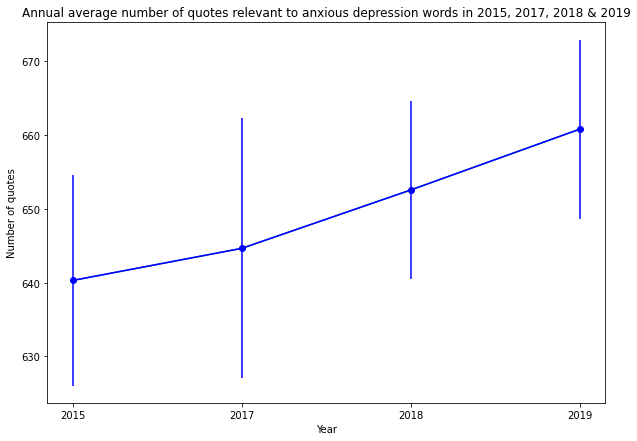

In [35]:
# making a simple plot
fig = plt.figure(figsize =(10, 7))

x =[1, 2, 3, 4]
y = trend_curve.Mean

y_error = trend_curve.STD

plt.xlabel("Year")
plt.ylabel("Number of quotes")
plt.title('Annual average number of quotes relevant to anxious depression words in 2015, 2017, 2018 & 2019')

x_ticks = ['2015', '2017', '2018', '2019']
plt.xticks(x, x_ticks)

# ploting graph
plt.plot(x,y)
plt.errorbar(x, y, yerr = y_error, fmt ='-bo')


plt.savefig('Trend of anxiety quotes in 2015, 2017, 2018 & 2019')
